<a href="https://colab.research.google.com/github/mahi97/MahiColabs/blob/master/auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import math
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def autoencoder(dimensions=[784, 512, 256, 64]):
  x = tf.placeholder(tf.float64, [None, dimensions[0]], name='x')
  current_input = x
  
  encoder = []
  for layer_i, n_output in enumerate(dimensions[1:]):
      n_input = int(current_input.get_shape()[1])
      W = tf.Variable(
          tf.random_uniform([n_input, n_output],
                            -1.0 / math.sqrt(n_input),
                            1.0 / math.sqrt(n_input), dtype=tf.float64))
      b = tf.Variable(tf.zeros([n_output], dtype=tf.float64))
      encoder.append(W)
      output = tf.nn.tanh(tf.matmul(current_input, W) + b)
      current_input = output

  # %% latent representation
  z = current_input
  encoder.reverse()

  # %% Build the decoder using the same weights
  for layer_i, n_output in enumerate(dimensions[:-1][::-1]):
      W = tf.transpose(encoder[layer_i])
      b = tf.Variable(tf.zeros([n_output], dtype=tf.float64))
      output = tf.nn.tanh(tf.matmul(current_input, W) + b)
      current_input = output

  # %% now have the reconstruction through the network
  y = current_input

  # %% cost function measures pixel-wise difference
  cost = tf.reduce_sum(tf.square(y - x))
  return {'x': x, 'z': z, 'y': y, 'cost': cost}

In [0]:
import tensorflow.keras.datasets.mnist as mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_test = [[0 == b,
                   1 == b,
                   2 == b,
                   3 == b,
                   4 == b,
                   5 == b,
                   6 == b,
                   7 == b,
                   8 == b,
                   9 == b] for b in y_test]
y_train = [[0 == b,
                   1 == b,
                   2 == b,
                   3 == b,
                   4 == b,
                   5 == b,
                   6 == b,
                   7 == b,
                   8 == b,
                   9 == b] for b in y_train]

In [4]:
"""Test the autoencoder using MNIST."""
mean_img = np.mean(X_train, axis=0)
ae = autoencoder(dimensions=[784, 256, 64, 32, 16])

# %%
learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(ae['cost'])

# %%
# We create a session to use the graph
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# %%
# Fit all training data
batch_size = 50
n_epochs = 50
for epoch_i in range(n_epochs):
    for batch_i in range(X_train.shape[0] // batch_size):
      batch_xs = X_train[batch_i * batch_size: (batch_i + 1) * batch_size]
      train = np.array([img - mean_img for img in batch_xs]).reshape(batch_size,784)
      sess.run(optimizer, feed_dict={ae['x']: train})
    print(epoch_i, sess.run(ae['cost'], feed_dict={ae['x']: train}))

0 1418.4687188789112
1 1411.4646024101175
2 1421.9131080073128
3 1401.4730398941365
4 1393.0851853206468
5 1397.5226231743673
6 1401.3673471684378
7 1410.217915927766
8 1378.7218118843812
9 1378.7294325616756
10 1398.9159327630255
11 1381.1936218557476
12 1380.8765736657303
13 1372.7111039120555
14 1374.2232993475395
15 1377.2089746658885
16 1381.671573597526
17 1366.5522987208374
18 1365.9897830552281
19 1359.8864561540345
20 1370.790291567979
21 1405.543814440157
22 1368.6735861080338
23 1356.0096982105529
24 1346.9159440004491
25 1343.6572817937795
26 1344.9672858053445
27 1341.2349466291366
28 1329.2165355967422
29 1337.2795106014128
30 1333.5730389463067
31 1334.9200812518511
32 1340.9798134120826
33 1331.8567610243326
34 1325.0738492469266
35 1315.2920522545728
36 1319.1587134599292
37 1322.3450048460868
38 1349.964682723939
39 1300.9343605527197
40 1303.3485127889649
41 1324.0097590395287
42 1301.2495068953863
43 1284.3492447650117
44 1277.473847793633
45 1279.0476509270657
46 1

0


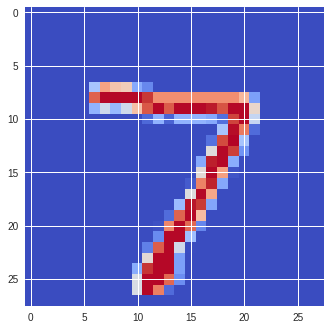

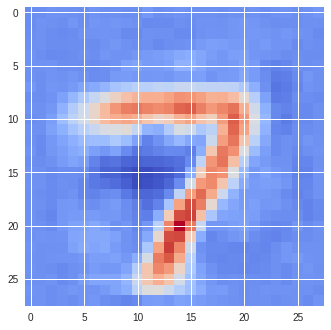

1


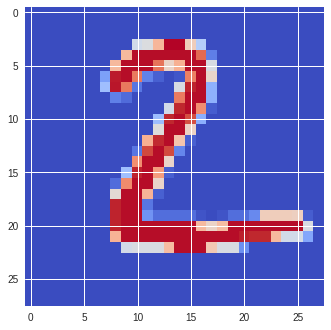

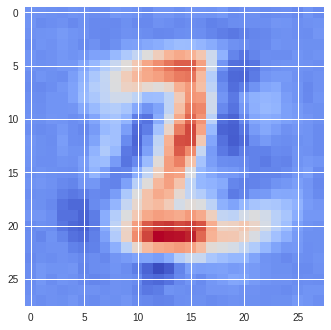

2


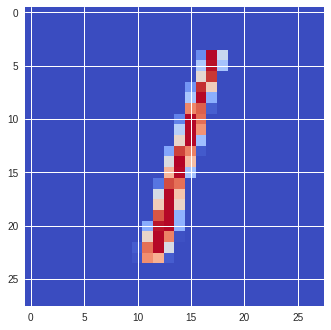

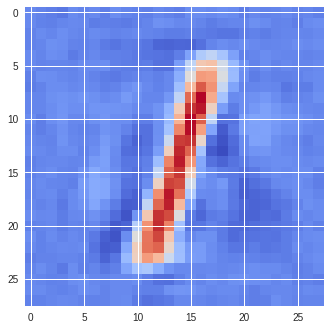

3


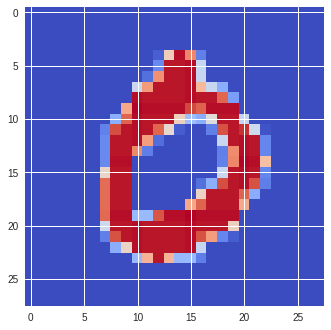

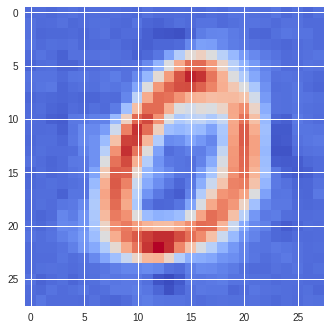

4


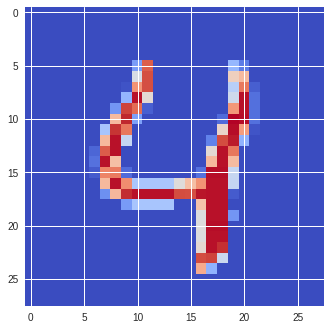

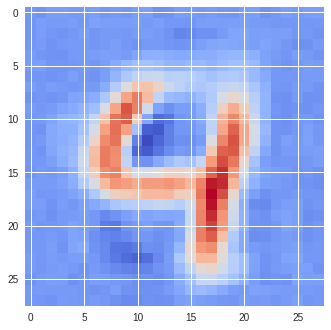

5


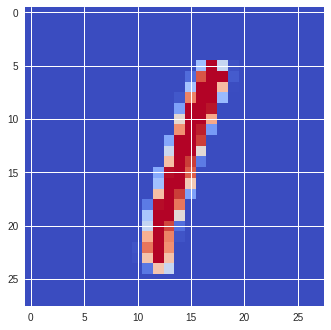

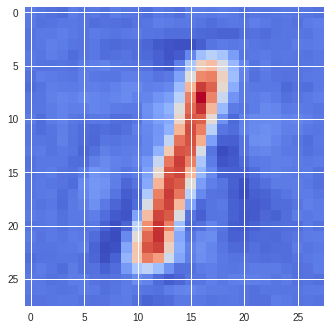

6


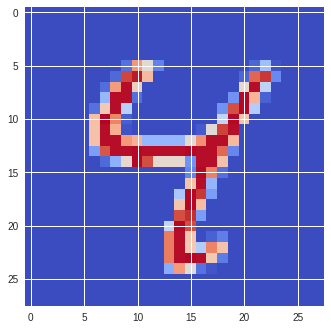

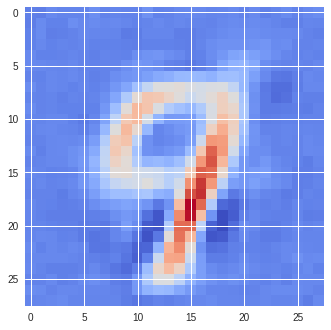

7


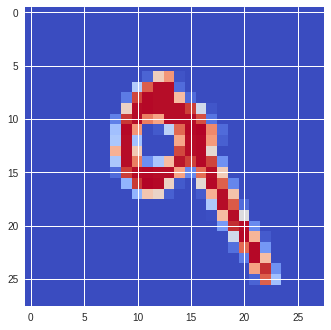

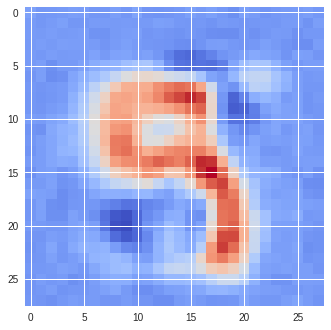

8


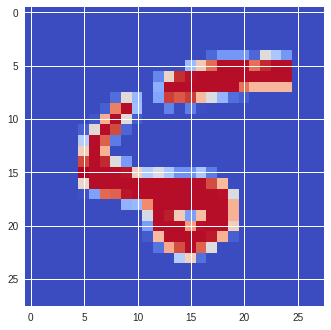

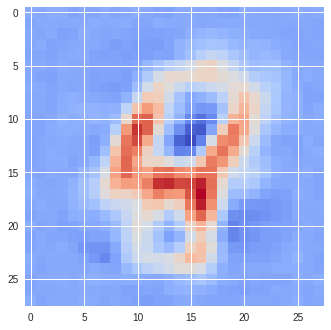

9


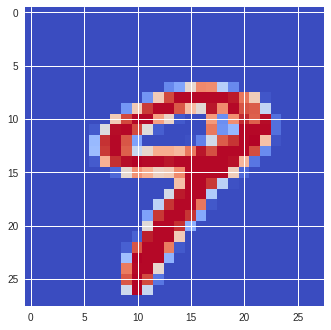

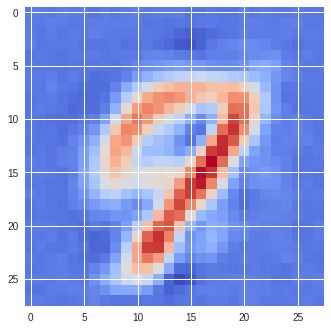

10


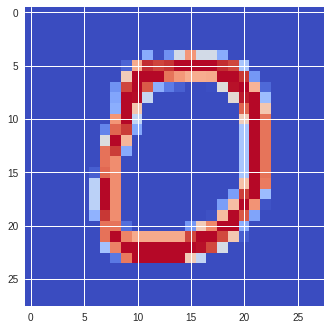

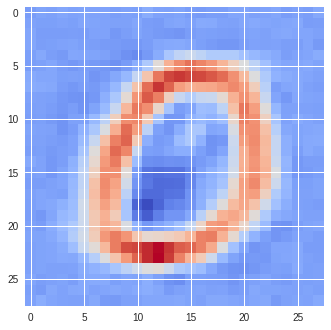

11


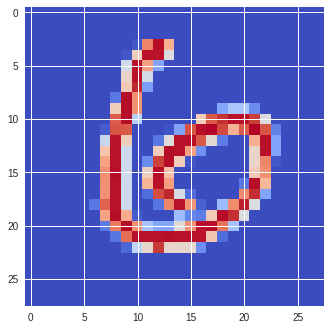

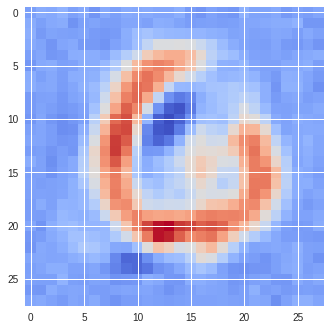

12


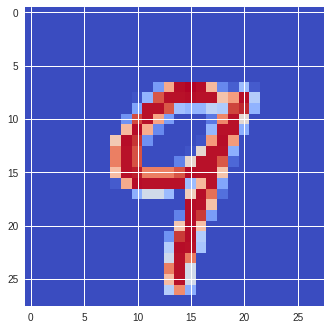

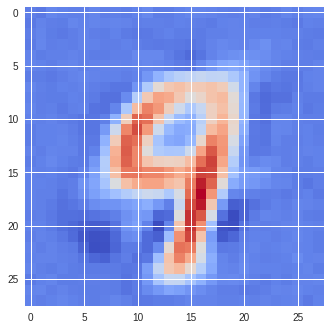

13


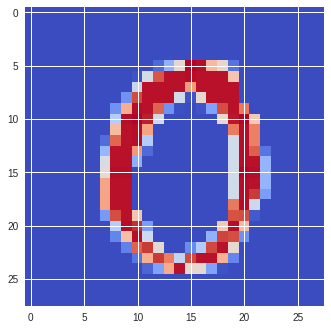

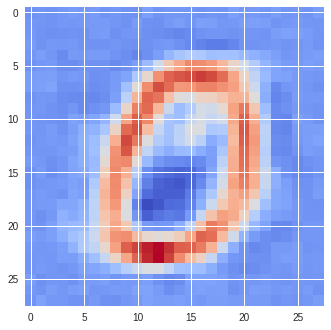

14


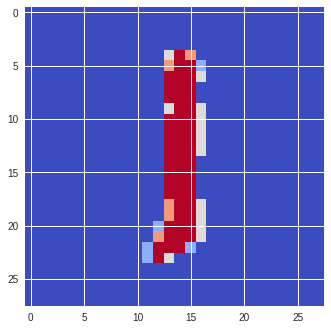

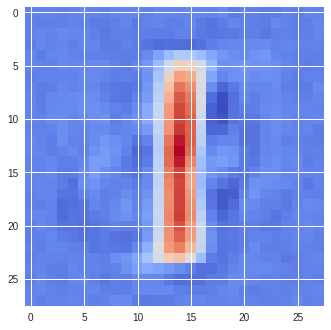

In [10]:
# Plot example reconstructions
n_examples = 15
mean_img = np.mean(X_train, axis=0)
test_xs =X_test[0 * n_examples: (0 + 1) * n_examples]
test_xs_norm = np.array([img - mean_img for img in test_xs]).reshape(n_examples,784)
recon = sess.run(ae['y'], feed_dict={ae['x']: test_xs_norm})
for example_i in range(n_examples):
    print(example_i)
    plt.imshow(
        np.reshape(test_xs[example_i, :], (28, 28)), cmap='coolwarm')
    plt.show()
    plt.imshow(
        np.reshape([recon[example_i, :] + mean_img.reshape(784,)], (28, 28)), cmap='coolwarm')
    plt.show()